# Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data import

In [56]:
characters_stats = pd.read_csv("./raw_data/characters_stats.csv")
characters_stats.set_index("Name")

marvel_characters_info = pd.read_csv("./raw_data/marvel_characters_info.csv")
marvel_characters_info.set_index("Name")

,ID,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
Name,,,,,,,,,,
A-Bomb,0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
Abe Sapien,1,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
Abin Sur,2,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
Abomination,3,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
Abraxas,4,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,729,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
Ymir,730,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
Yoda,731,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0


# Merging tables

In [57]:
characters_info = marvel_characters_info.merge(characters_stats, on="Name", how="left")

# Getting rid of useless data

In [58]:
characters_info.drop(["Alignment_y", "ID"], axis = 1, inplace = True)
characters_info.rename(columns={"Alignment_x": "IsBad"}, inplace = True)

characters_info = characters_info.drop_duplicates(subset=["Name"])
characters_info.set_index("Name", inplace = True)

# Leaving Marvel characters only

In [59]:
characters_info = characters_info[ characters_info["Publisher"] == "Marvel Comics" ]
characters_info.drop("Publisher", axis = 1, inplace = True)

# Normalizing alignment column

In [60]:
characters_info["IsBad"] = characters_info["IsBad"].replace(["good", "bad", "-", "neutral"], [0,1,0,0])
characters_info["IsBad"] = characters_info["IsBad"].astype("bool")

# Fixing negative weights and heights

In [61]:
characters_info["Height"] = characters_info["Height"].replace(-99, np.nan)
characters_info["Weight"] = characters_info["Weight"].replace(-99, np.nan)

# Data visualisation

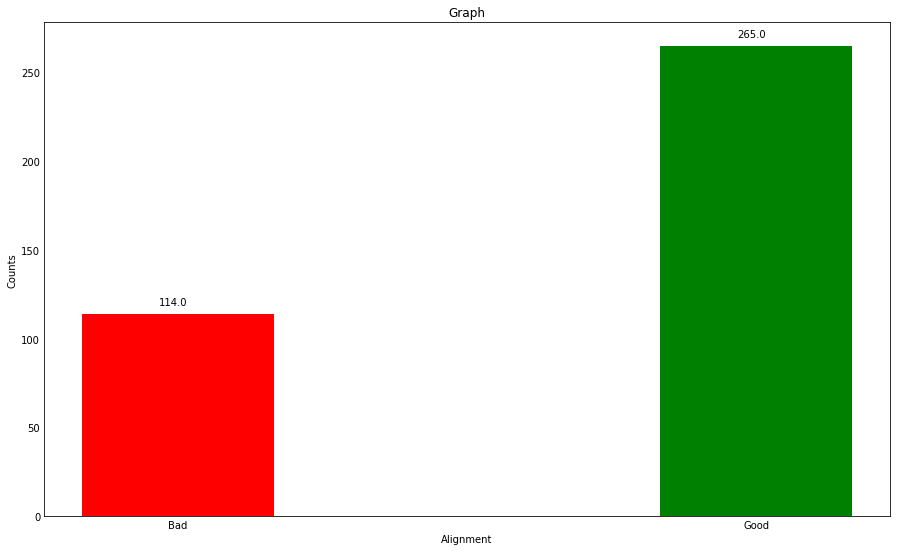

In [62]:
good, bad = characters_info["IsBad"].value_counts()

plt.style.use("_mpl-gallery")
width = 50

fig,ax=plt.subplots(figsize=(12,7),edgecolor="k")
p1=ax.bar(good, good, width, color="g")
p2=ax.bar(bad, bad, width, color="r")
ax.set_xticks([good, bad])
ax.set_xticklabels(("Good", "Bad"))
ax.set_title("Graph")
plt.xlabel("Alignment")
plt.ylabel("Counts")

for p in ax.patches:
   ax.annotate("{:.1f}".format(p.get_height()), (p.get_x()+20, p.get_height() + 5))

plt.grid()
plt.show()

In [63]:
characters_info.to_csv("./marvel_characters.csv")